## Installing powerlaw package

This tool allows you to test if a probability distribution fits a power law.

In [15]:
#! pip install powerlaw

## Importing packages

In [11]:
from IPython.core.display import Image 
import collections
import matplotlib.pyplot as plt

In [16]:
from powerlaw import plot_pdf, Fit, pdf

## Functions

**Log-log plot**

In [17]:
def plot_basics(counter, data_inst, fig, units):
    from powerlaw import plot_pdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax = fig.add_subplot(n_graphs,n_data,data_inst)
    
    ax.plot(counter.keys(),counter.values(),marker='o',linestyle='')

    ax.set_yscale('log')
    ax.set_xscale('log')
    
    ax.set_xlabel(units)

**Complementary Cumulative Distribution Function (CCDF)**

In [18]:
def plot_basics_ccdf(data, data_inst, fig, units):
    from powerlaw import plot_ccdf, Fit, pdf
    annotate_coord = (-.4, .95)
    ax = fig.add_subplot(n_graphs,n_data,data_inst)
    
    plot_ccdf(data, ax=ax, color='r', linewidth=.5)
    
    ax.set_xlabel(units)

**Probability density function (PDF) after fitting**

In [19]:
def plot_fit_pdf(data, data_inst, fig, units):
    from powerlaw import plot_ccdf, Fit, pdf, plot_pdf
    annotate_coord = (-.4, .95)
    ax = fig.add_subplot(n_graphs,n_data,data_inst)
    
    fit = Fit(data, discrete=True)
    fit.plot_pdf(ax=ax, color='r')
    fit.power_law.plot_pdf(ax=ax, linestyle=':', color='g')
    fit.exponential.plot_pdf(ax=ax, linestyle=':', color='b')
    
    ax.set_ylim(0.00000001, 1)
    #ax.set_yticks(ax3.get_yticks()[::2])
    #ax.set_xlim(ax1.get_xlim()
    
    #plot_ccdf(data, ax=ax, color='r', linewidth=.5)
    
    ax.set_xlabel(units)

**Complementary Cumulative Distribution Function (CCDF) after fitting**

In [20]:
def plot_fit_ccdf(data, data_inst, fig, units):
    from powerlaw import plot_ccdf, Fit, pdf, plot_pdf
    annotate_coord = (-.4, .95)
    ax = fig.add_subplot(n_graphs,n_data,data_inst)
    
    fit = Fit(data, discrete=True)
    fit.plot_ccdf(ax=ax, color='r')
    fit.power_law.plot_ccdf(ax=ax, linestyle=':', color='g')
    
    fit = Fit(data, discrete=True, xmin=1)
    #plot_ccdf(data, ax=ax, color='r')
    fit.power_law.plot_ccdf(ax=ax, linestyle='--', color='b')
    #fit.exponential.plot_ccdf(ax=ax, linestyle=':', color='b')
    
    if data_inst == 1:
        ax.set_ylim(0.00001, 1)
    else:
        ax.set_ylim(0.001, 1)
    #ax.set_yticks(ax3.get_yticks()[::2])
    #ax.set_xlim(ax1.get_xlim()
    
    #plot_ccdf(data, ax=ax, color='r', linewidth=.5)
    
    ax.set_xlabel(units)

## Datasets

**Word:** The frequency of word usage in the book Moby Dick <br>
**Neuron:** The number of connections each neuron has in the nematode worm C <br>
**Blackout:** The number of people in the United States affected by electricity blackouts from 1984–2002 <br>

In [21]:
from numpy import genfromtxt

blackouts = genfromtxt('data/blackouts.txt')
words = genfromtxt('data/words.txt')
#city = genfromtxt('data/cities.txt')
worm = genfromtxt('data/worm.txt')
worm = worm[worm>1]

## Visualization

Distribution plot in **log-log scale**

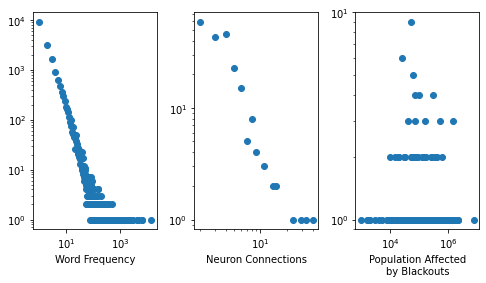

In [22]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

n_data = 3
n_graphs = 1
f = figure(figsize=(8,4))

data = words
data_inst = 1
units = 'Word Frequency'
plot_basics(collections.Counter(words), data_inst, f, units)

data_inst = 2
#data = city
#units = 'City Population'
data = worm
units = 'Neuron Connections'
plot_basics(collections.Counter(worm), data_inst, f, units)

data = blackouts
data_inst = 3
units = 'Population Affected\nby Blackouts'
plot_basics(collections.Counter(blackouts), data_inst, f, units)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
f.savefig('basics_frequ.png', bbox_inches='tight')
plt.close()

Image(filename='basics_frequ.png') 

The *Word* dataset represents a highly skewed distribution. The *Neuron* distribution seems to be skewed as well while the *Blackout* dataset does not really look like a distribution with a long tail. <br>
Let's check whether the data follows a power law distribution.

## Complementary Cumulated Distribution Function (CCDF)

CCDF is commonly used to visualize the probability that X will take a value less than or equal to x.

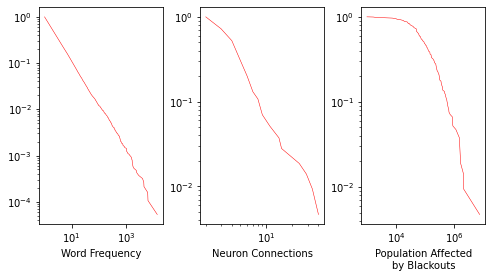

In [23]:
n_data = 3
n_graphs = 1
f = figure(figsize=(8,4))

data = words
data_inst = 1
units = 'Word Frequency'
plot_basics_ccdf(data, data_inst, f, units)

data_inst = 2
#data = city
#units = 'City Population'
data = worm
units = 'Neuron Connections'
plot_basics_ccdf(data, data_inst, f, units)

data = blackouts
data_inst = 3
units = 'Population Affected\nby Blackouts'
plot_basics_ccdf(data, data_inst, f, units)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
plt.savefig('basics_ccdf.png', bbox_inches='tight')
plt.close()

Image(filename='basics_ccdf.png') 

We use the logarithmic axes and show the complete range of values. <br>
From the definition of power law, we know that the distribution might be power law if the plots show a straight line. <br>
Hence, these plots confirm our observations from before.

### Probability Density Functions (PDF)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


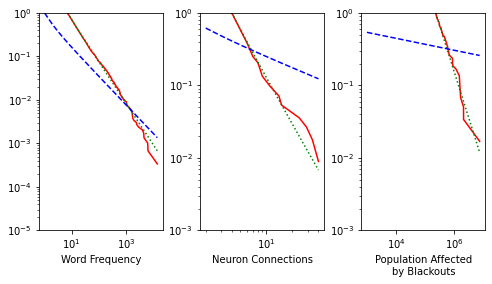

In [24]:
n_data = 3
n_graphs = 1
f = figure(figsize=(8,4))

data = words
data_inst = 1
units = 'Word Frequency'
plot_fit_ccdf(data, data_inst, f, units)

data_inst = 2
#data = city
#units = 'City Population'
data = worm
units = 'Neuron Connections'
plot_fit_ccdf(data, data_inst, f, units)

data = blackouts
data_inst = 3
units = 'Population Affected\nby Blackouts'
plot_fit_ccdf(data, data_inst, f, units)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
f.savefig('fit_ccdf.png', bbox_inches='tight')
plt.close()

Image(filename='fit_ccdf.png') 

The figures illustrate the *probability density functions (PDF)*
for the data (red solid line), the power law fit for the best xmin fit (green dotted line) 
and the fit with a fixed xmin of 1 (blue dashed line)

## Fitting the power law

The primary step is to estimate both *xmin* and *α*. All these things are done by *powerlaw.Fit()*

We are interested in the tail of a heavy-tailed distribution as the small values do not follow a power law. Note  that power laws are also undefined for xmin 0. We can set *xmin* by ourselves or we can estimate the **best value** of *xmin*. <br>
One method for estimating the best value of xmin is to create a fit for each value in your data and choose the one resulting in the minimal *Kolmogorov-Smirnov distance D* between the corresponding fit and your data. 

In the *powerlaw* package we can **manually** set a *xmin* value if the data is descrete. When we do not specify a **xmin** value, the best value is determined **automatically**. 

For finding *α* one can use the maximum likelihood method. 

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


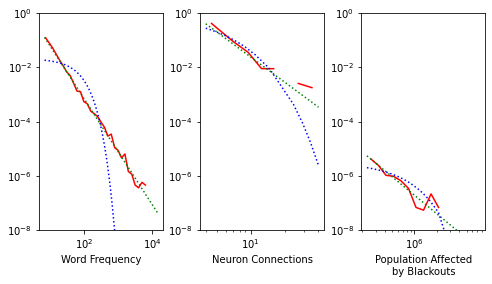

In [25]:
n_data = 3
n_graphs = 1
f = figure(figsize=(8,4))

data = words
data_inst = 1
units = 'Word Frequency'
plot_fit_pdf(data, data_inst, f, units)

data_inst = 2
# data = city
# units = 'City Population'
data = worm
units = 'Neuron Connections'
plot_fit_pdf(data, data_inst, f, units)

data_inst = 3
data = blackouts
units = 'Population Affected\nby Blackouts'
plot_fit_pdf(data, data_inst, f, units)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
f.savefig('fit_pdf.png', bbox_inches='tight')
plt.close()

Image(filename='fit_pdf.png') 

The figures illustrate the *probability density functions (PDF)* for the data (red solid line), the power law fit for the best *xmin* fit (green dotted line) and the fit with a fixed *xmin = 1* (blue dashed line):

We can see clear differences for a fixed and best *xmin* fit. 

The power law seems to be a very good fit for the *Word* dataset. For the *Neuron* dataset it is a moderate fit, and for the *Blackout* data it is no good fit at all. 



In numbers we can check the values of *xmin(, *α* and the *Kolmogorov-Smirnov distance D*

In [26]:
import powerlaw
data = words
fit = powerlaw.Fit(data, discrete=True)
print("**** Words ****")
print("xmin", fit.xmin)
print("alpha", fit.alpha)
print("D", fit.D)

print("**** Neuron ****")
data = worm
fit = powerlaw.Fit(data, discrete=True)
print("xmin", fit.xmin)
print("alpha", fit.alpha)
print("D", fit.D)

print("**** Blackouts ****")
data = blackouts
fit = powerlaw.Fit(data, discrete=True)
print("xmin", fit.xmin)
print("alpha", fit.alpha)
print("D", fit.D)


Calculating best minimal value for power law fit
**** Words ****99%
xmin 7.0
alpha 1.9501572269094178
D 0.00922886388026034
**** Neuron ****
Calculating best minimal value for power law fit
xmin 4.0gress: 92%
alpha 3.0680986449882477
D 0.032069835751601716
**** Blackouts ****
Calculating best minimal value for power law fit
xmin 230000.0: 99%
alpha 2.272633698954695
D 0.06067335894897041


In [27]:
import powerlaw

data = words
fit = powerlaw.Fit(data, discrete=True, xmin=1)
print("**** Words ****")
print("xmin", fit.xmin)
print("alpha", fit.alpha)
print("D", fit.D)

data = worm
fit = powerlaw.Fit(data, discrete=True, xmin=1)
print("**** Neuron ****")
print("xmin", fit.xmin)
print("alpha", fit.alpha)
print("D", fit.D)

data = blackouts
fit = powerlaw.Fit(data, discrete=True, xmin=1)
print("**** Blackouts ****")
print("xmin", fit.xmin)
print("alpha", fit.alpha)
print("D", fit.D)


**** Words ****
xmin 1.0
alpha 1.6551331335143833
D 0.052901694587085935
**** Neuron ****
xmin 1.0
alpha 1.4965946310360758
D 0.3808276981409207
**** Blackouts ****
xmin 1.0
alpha 1.082353930240705
D 0.5092063861032725


## Goodness of fit 

We consider the *goodness of fit* in order to conclude that power law is a good fit for our data at hand.<br>
One way to do this is comparing the power law fit to fits of other distribution using log-likelihood ratios. <br> 
Some potential candidate functions could be *exponential*, *lognormal*. 

We also print two values: <br>
*R* = log-likelihood ratio between both distributions <br>
*p* = p-value<br>
If *R* is positive, than the first distribution is a better fit while if it is negative, the second one should be prefered.<br>
The *p-value* specifies the significance for this ratio and we can prefer a *p-value* below 0.1 for statistical significance.

Calculating best minimal value for power law fit
Comparison with lognormal:
 R = 0.008785246720703466 p-value = 0.9492243713201907

Comparison with exponential:
 R = 3025.0229258679205 p-value = 6.485614241379581e-20



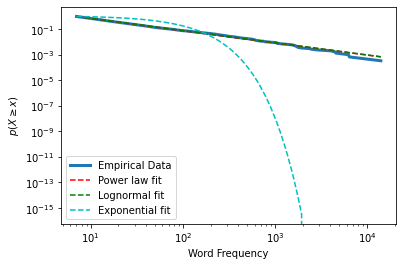

In [28]:
data = words
fit = powerlaw.Fit(data, discrete=True)

R, p = fit.distribution_compare('power_law', 'lognormal')
print("Comparison with lognormal:\n R = "+str(R)+(" p-value = ")+str(p)+"\n")

R, p = fit.distribution_compare('power_law', 'exponential')
print("Comparison with exponential:\n R = "+str(R)+(" p-value = ")+str(p)+"\n")

fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
fit.exponential.plot_ccdf(ax=fig, color='c', linestyle='--', label='Exponential fit')
####
fig.set_ylabel(r"$p(X\geq x)$")
fig.set_xlabel(r"Word Frequency")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
plt.savefig('word_compare.png', bbox_inches='tight')
plt.close()

Image(filename='word_compare.png') 

The exponential distribution is a much worse fit (high R value of 3025.03 and a p-value way below 0.1). **Lognormal and power law seem to be an equally good fit to the word data (a high p-value).**

Let's see what happen for the *Worm* dataset

Calculating best minimal value for power law fit
Comparison with lognormal:
 R = -0.07681516451364034 p-value = 0.8405642403755008

Comparison with exponential:
 R = 16.384325448885427 p-value = 0.024184177728485495



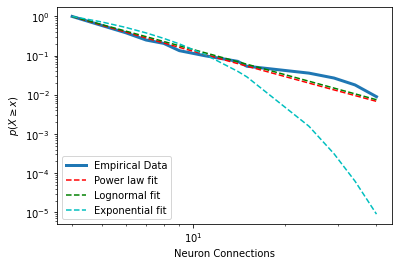

In [29]:
data = worm
fit = powerlaw.Fit(data, discrete=True)


R, p = fit.distribution_compare('power_law', 'lognormal')
print("Comparison with lognormal:\n R = "+str(R)+(" p-value = ")+str(p)+"\n")

R, p = fit.distribution_compare('power_law', 'exponential')
print("Comparison with exponential:\n R = "+str(R)+(" p-value = ")+str(p)+"\n")

fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
fit.exponential.plot_ccdf(ax=fig, color='c', linestyle='--', label='Exponential fit')
####
fig.set_ylabel(r"$p(X\geq x)$")
fig.set_xlabel(r"Neuron Connections")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
plt.savefig('worm_compare.png', bbox_inches='tight')
plt.close()

Image(filename='worm_compare.png') 

and finally for the *Blackouts* dataset

Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 00%
xmin progress: 01%
xmin progress: 01%
xmin progress: 02%
xmin progress: 03%
xmin progress: 03%
xmin progress: 04%
xmin progress: 05%
xmin progress: 05%
xmin progress: 06%
xmin progress: 07%
xmin progress: 07%
xmin progress: 08%
xmin progress: 09%
xmin progress: 09%
xmin progress: 10%
xmin progress: 11%
xmin progress: 11%
xmin progress: 12%
xmin progress: 13%
xmin progress: 13%
xmin progress: 14%
xmin progress: 15%
xmin progress: 15%
xmin progress: 16%
xmin progress: 17%
xmin progress: 17%
xmin progress: 18%
xmin progress: 19%
xmin progress: 19%
xmin progress: 20%
xmin progress: 21%
xmin progress: 21%
xmin progress: 22%
xmin progress: 23%
xmin progress: 23%
xmin progress: 24%
xmin progress: 25%
xmin progress: 25%
xmin progress: 26%
xmin progress: 26%
xmin progress: 27%
xmin progress: 28%
xmin progress: 28%
xmin progress: 29%
xmin progress: 30%
xmin progress: 30%
xmin progress: 31%
xmin progress: 32%
x

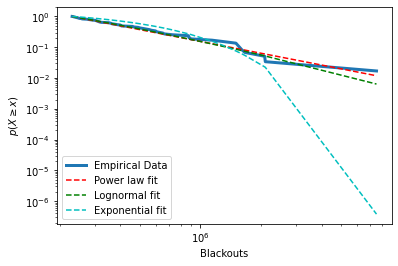

In [ ]:
data = blackouts
fit = powerlaw.Fit(data, discrete=True)

R, p = fit.distribution_compare('power_law', 'lognormal')
print("Comparison with lognormal:\n R = "+str(R)+(" p-value = ")+str(p)+"\n")

R, p = fit.distribution_compare('power_law', 'exponential')
print("Comparison with exponential:\n R = "+str(R)+(" p-value = ")+str(p)+"\n")

fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
fit.exponential.plot_ccdf(ax=fig, color='c', linestyle='--', label='Exponential fit')
####
fig.set_ylabel(r"$p(X\geq x)$")
fig.set_xlabel(r"Blackouts")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)
plt.savefig('blackouts_compare.png', bbox_inches='tight')
plt.close()

Image(filename='blackouts_compare.png') 